In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy # library that let's us copy things
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation","rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

so basically what we did above was we just removed certian columns using the drop function and also we removed from the x axis

In [3]:
df.columns = dataset_cols

In [4]:
df["functional"] = (df["functional"] == "Yes").astype(int)

In [5]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


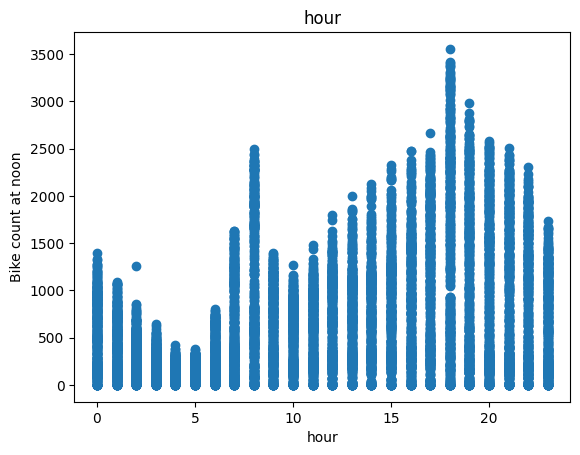

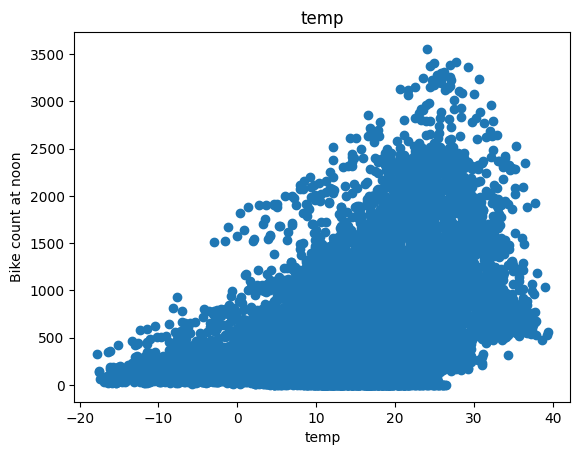

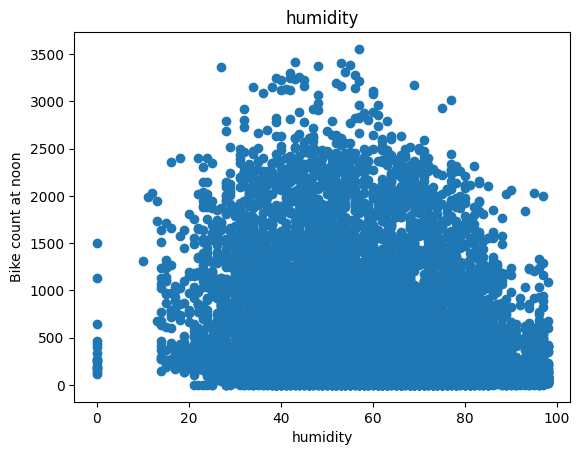

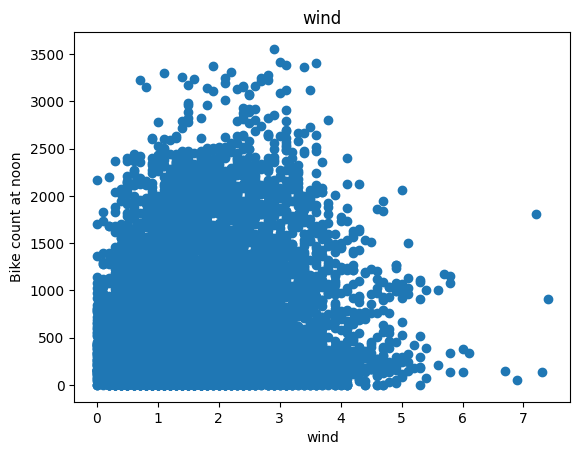

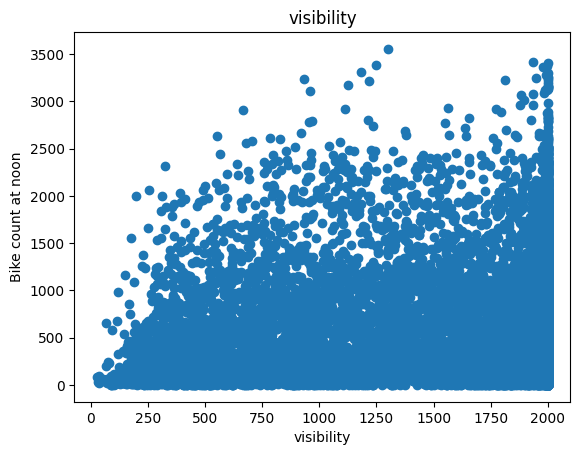

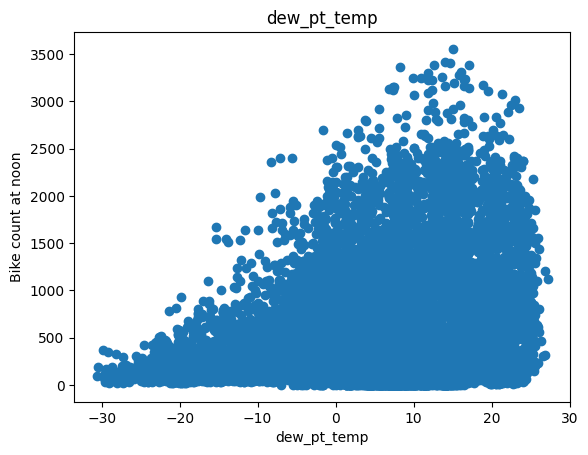

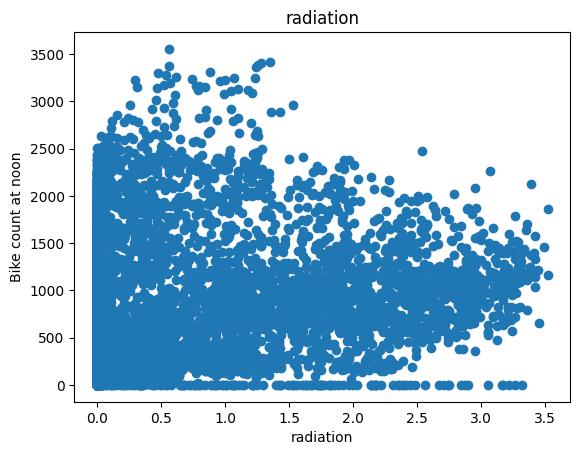

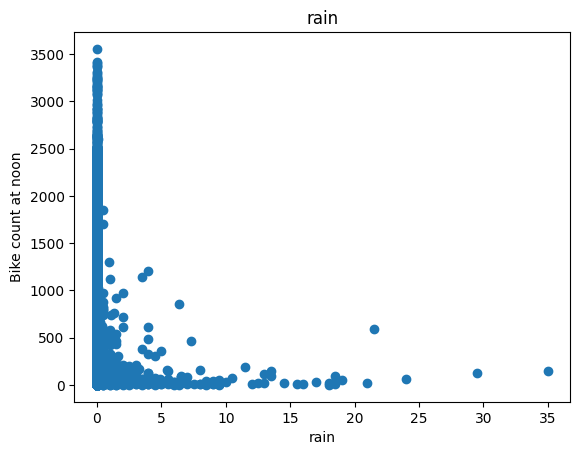

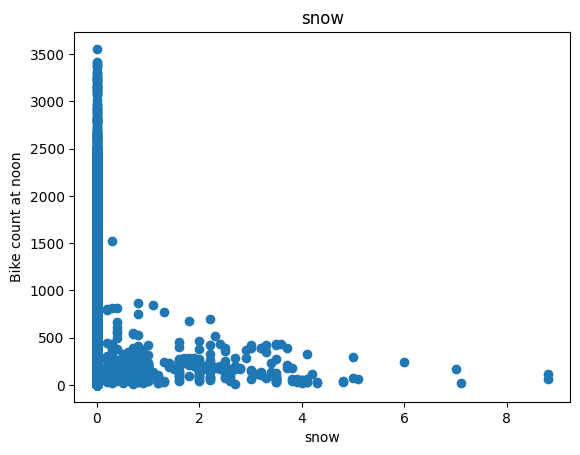

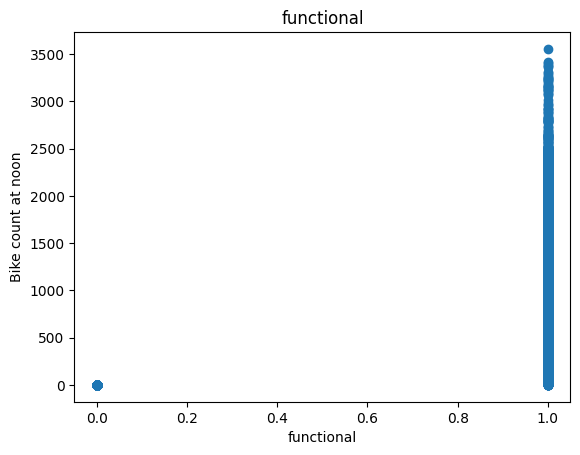

In [6]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike count at noon")
  plt.xlabel(label)
  plt.show()

In [7]:
df = df.drop(["wind", "visibility", "functional"],axis = 1)

In [8]:
df.head()

,bike_count,hour,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,0,-5.2,37,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,-18.6,0.0,0.0,0.0


# Train/valid/test

In [9]:
train,val,test = np.split(df.sample(frac = 1),[int(0.6*len(df)),int(0.8*len(df))])

In [10]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)  # making it 2d
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [11]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [12]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [13]:
print(temp_reg.coef_,temp_reg.intercept_) #printing regressors coeffiecient x intercept and y intercept

[[28.97232214]] [328.5757998]


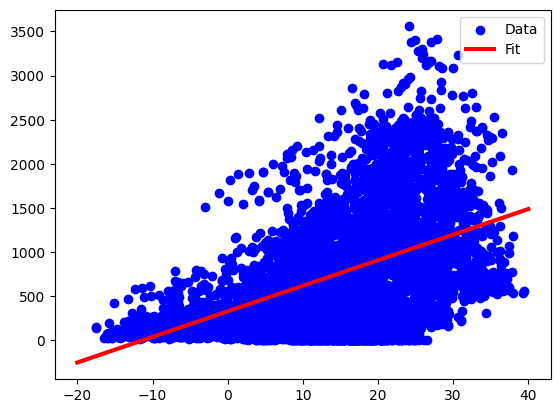

In [15]:
# Reshape x_np to be a 2D array
x_np_2d = x_np.reshape(-1, 1)

# Predict using the reshaped array
predictions = temp_reg.predict(x_np_2d)

# Plot the data and the fit line
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
plt.plot(x_np, predictions, label="Fit", color="red", linewidth=3)
plt.legend()
plt.show()
